In [1]:
import pandas as pd
import numpy as np
from quantmod.markets import getData
import matplotlib.pyplot as plt
import plotly.express as px

## Step 1: Prepare Data (Vanguard Australian Shares Index ETF)

In [2]:
df = getData("VAS.AX", period="5d", interval="1m")
df = df.reset_index()
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_convert('Australia/Sydney')
df['Datetime']

0      2025-06-23 10:00:00+10:00
1      2025-06-23 10:01:00+10:00
2      2025-06-23 10:02:00+10:00
3      2025-06-23 10:03:00+10:00
4      2025-06-23 10:04:00+10:00
                  ...           
1700   2025-06-27 15:48:00+10:00
1701   2025-06-27 15:49:00+10:00
1702   2025-06-27 15:50:00+10:00
1703   2025-06-27 15:51:00+10:00
1704   2025-06-27 15:52:00+10:00
Name: Datetime, Length: 1705, dtype: datetime64[ns, Australia/Sydney]

In [3]:
# Assumption 1: Make 10,000 orders of VAS    
total_quantity = 10000

# Assumption 2: Make orders within the 30 minutes
start_time = pd.to_datetime("2025-06-24 10:00:00").tz_localize("Australia/Sydney")
end_time = start_time + pd.Timedelta("30min")

# Fill out the time within requirment 
execu_df = df[(df['Datetime'] >= start_time) & (df['Datetime'] < end_time)].copy()
execu_df = execu_df.reset_index(drop=True)
execu_df = execu_df[execu_df['Volume'] > 0].copy()
execu_df

,Datetime,Open,High,Low,Close,Volume
1,2025-06-24 10:01:00+10:00,106.139999,106.239998,106.139999,106.239998,1524
2,2025-06-24 10:02:00+10:00,106.209999,106.239998,106.209999,106.220001,353
3,2025-06-24 10:03:00+10:00,106.239998,106.239998,106.230003,106.239998,383
4,2025-06-24 10:04:00+10:00,106.230003,106.230003,106.199997,106.220001,366
5,2025-06-24 10:05:00+10:00,106.199997,106.250000,106.180000,106.180000,2806
6,2025-06-24 10:06:00+10:00,106.199997,106.199997,106.199997,106.199997,125
7,2025-06-24 10:07:00+10:00,106.199997,106.230003,106.160004,106.209999,1038
8,2025-06-24 10:08:00+10:00,106.190002,106.209999,106.180000,106.209999,1107
9,2025-06-24 10:09:00+10:00,106.169998,106.230003,106.169998,106.230003,117
10,2025-06-24 10:10:00+10:00,106.230003,106.230003,106.160004,106.160004,248


In [4]:
# Simulate excuted prices under both methods
np.random.seed(42)
execu_df['Executed_Price_TWAP'] = execu_df['Close'] + np.random.normal(0, 0.01, size=len(execu_df))
execu_df['Executed_Price_VWAP'] = execu_df['Close'] + np.random.normal(0, 0.015, size=len(execu_df))
execu_df

,Datetime,Open,High,Low,Close,Volume,Executed_Price_TWAP,Executed_Price_VWAP
1,2025-06-24 10:01:00+10:00,106.139999,106.239998,106.139999,106.239998,1524,106.244965,106.235622
2,2025-06-24 10:02:00+10:00,106.209999,106.239998,106.209999,106.220001,353,106.218619,106.210976
3,2025-06-24 10:03:00+10:00,106.239998,106.239998,106.230003,106.239998,383,106.246475,106.267782
4,2025-06-24 10:04:00+10:00,106.230003,106.230003,106.199997,106.220001,366,106.235232,106.219799
5,2025-06-24 10:05:00+10:00,106.199997,106.250000,106.180000,106.180000,2806,106.177659,106.164135
6,2025-06-24 10:06:00+10:00,106.199997,106.199997,106.199997,106.199997,125,106.197656,106.212335
7,2025-06-24 10:07:00+10:00,106.199997,106.230003,106.160004,106.209999,1038,106.225791,106.191686
8,2025-06-24 10:08:00+10:00,106.190002,106.209999,106.180000,106.209999,1107,106.217673,106.213132
9,2025-06-24 10:09:00+10:00,106.169998,106.230003,106.169998,106.230003,117,106.225309,106.200608
10,2025-06-24 10:10:00+10:00,106.230003,106.230003,106.160004,106.160004,248,106.165429,106.140081


## Step 2: TWAP Method

In [5]:
# Make equal order per mintues 
num_orders = len(execu_df)
order_size = total_quantity // num_orders

execu_df['Order_Size_TWAP'] = order_size
execu_df['Executed_Value_TWAP'] = execu_df['Order_Size_TWAP'] * execu_df['Executed_Price_TWAP']

# Calculate the mean executed price 
twap_price = execu_df['Executed_Value_TWAP'].sum() / execu_df['Order_Size_TWAP'].sum()
print(f"TWAP Execution Average Price is {twap_price:.2f}")

TWAP Execution Average Price is 106.22


## Step 3: VWAP Method 

In [6]:
total_volume = execu_df['Volume'].sum()

execu_df['Order_Size_VWAP'] = total_quantity * execu_df['Volume'] / total_volume
execu_df['Executed_Value_VWAP'] = execu_df['Order_Size_VWAP'] * execu_df['Executed_Price_VWAP']

vwap_price = execu_df['Executed_Value_VWAP'].sum() / execu_df['Order_Size_VWAP'].sum()
print(f"VWAP Execution Average Price is {vwap_price:.2f}")

VWAP Execution Average Price is 106.17


## Step 4: Calculate Unit Price

In [7]:
execu_df['TWAP_Unit Price'] = execu_df['Executed_Value_TWAP'] / execu_df['Order_Size_TWAP']
execu_df['VWAP_Unit Price'] = execu_df['Executed_Value_VWAP'] / execu_df['Order_Size_VWAP']
execu_df['Order_Size_VWAP'].sum()

9999.999999999998

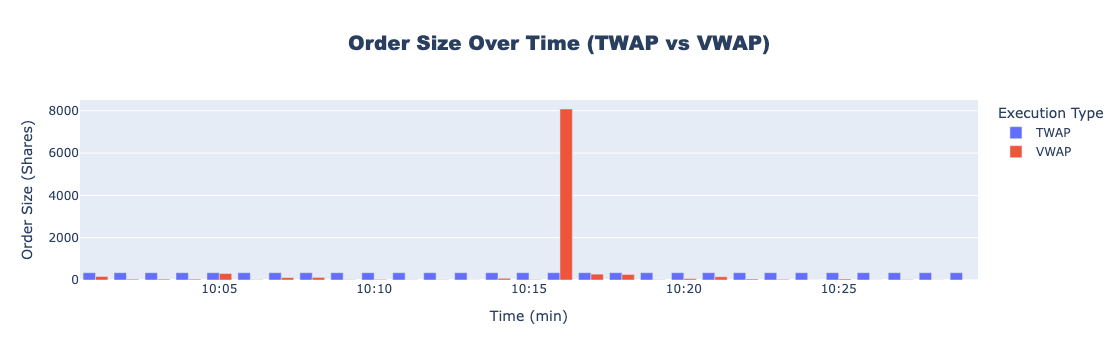

In [8]:
# Order Size Comparison 

order_size_df = execu_df[['Datetime', 'Order_Size_TWAP', 'Order_Size_VWAP']].copy()
order_size_df = order_size_df.rename(columns={
    'Order_Size_TWAP': 'TWAP',
    'Order_Size_VWAP': 'VWAP'
})


order_size_long = order_size_df.melt(
    id_vars='Datetime',
    value_vars=['TWAP', 'VWAP'],
    var_name='Execution_Type',
    value_name='Order_Size'
)


fig = px.bar(
    order_size_long,
    x='Datetime',
    y='Order_Size',
    color='Execution_Type',
    barmode='group',
    title='Order Size Over Time (TWAP vs VWAP)',
    labels={'Order_Size': 'Order Size (Shares)', 'Datetime': 'Time'}
)


fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center', 'font': dict(size=20, family='Arial Black')},
    xaxis_tickformat='%H:%M',
    legend_title="Execution Type",
    xaxis_title="Time (min)",
    hovermode='x unified'
)

fig.show()

In [9]:
# Execution Price Comparison

compare_df = pd.DataFrame({
    'Datetime': execu_df['Datetime'],
    'TWAP': execu_df['TWAP_Unit Price'],
    'VWAP': execu_df['VWAP_Unit Price'],
    'Market Close': execu_df['Close']
})

compare_df = compare_df.melt(id_vars='Datetime',
                             value_vars=['TWAP', 'VWAP', 'Market Close'],
                             var_name='Execution_Type',
                             value_name='Price')

fig = px.line(
    compare_df,
    x='Datetime',
    y='Price',
    color='Execution_Type',
    title='', 
    markers=True
)

fig.update_layout(
    title={
        'text': 'Execution Price Comparison',
        'font': dict(size=20, family='Arial Black'),
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 20,
            'family': 'Arial',
            'color': 'black'
        }
    },
    yaxis_title="Price ($)",
    xaxis_title= "Time (min)",
    legend_title="Execution Type"
)

fig.show()

In [10]:
# Slippage
execu_df['Slippage_TWAP'] = execu_df['TWAP_Unit Price'] - execu_df['Close']
execu_df['Slippage_VWAP'] = execu_df['VWAP_Unit Price'] - execu_df['Close']
execu_df

,Datetime,Open,High,Low,Close,Volume,Executed_Price_TWAP,Executed_Price_VWAP,Order_Size_TWAP,Executed_Value_TWAP,Order_Size_VWAP,Executed_Value_VWAP,TWAP_Unit Price,VWAP_Unit Price,Slippage_TWAP,Slippage_VWAP
1,2025-06-24 10:01:00+10:00,106.139999,106.239998,106.139999,106.239998,1524,106.244965,106.235622,344,36548.267962,165.641371,17597.014176,106.244965,106.235622,0.004967,-0.004375
2,2025-06-24 10:02:00+10:00,106.209999,106.239998,106.209999,106.220001,353,106.218619,106.210976,344,36539.204791,38.367063,4075.003195,106.218619,106.210976,-0.001383,-0.009026
3,2025-06-24 10:03:00+10:00,106.239998,106.239998,106.230003,106.239998,383,106.246475,106.267782,344,36548.787314,41.627720,4423.685468,106.246475,106.267782,0.006477,0.027784
4,2025-06-24 10:04:00+10:00,106.230003,106.230003,106.199997,106.220001,366,106.235232,106.219799,344,36544.919643,39.780014,4225.425119,106.235232,106.219799,0.015230,-0.000202
5,2025-06-24 10:05:00+10:00,106.199997,106.250000,106.180000,106.180000,2806,106.177659,106.164135,344,36525.114617,304.980110,32377.949460,106.177659,106.164135,-0.002342,-0.015866
6,2025-06-24 10:06:00+10:00,106.199997,106.199997,106.199997,106.199997,125,106.197656,106.212335,344,36531.993519,13.586070,1443.008270,106.197656,106.212335,-0.002341,0.012338
7,2025-06-24 10:07:00+10:00,106.199997,106.230003,106.160004,106.209999,1038,106.225791,106.191686,344,36541.672177,112.818729,11980.411116,106.225791,106.191686,0.015792,-0.018313
8,2025-06-24 10:08:00+10:00,106.190002,106.209999,106.180000,106.209999,1107,106.217673,106.213132,344,36538.879661,120.318240,12779.377124,106.217673,106.213132,0.007674,0.003133
9,2025-06-24 10:09:00+10:00,106.169998,106.230003,106.169998,106.230003,117,106.225309,106.200608,344,36541.506163,12.716562,1350.506616,106.225309,106.200608,-0.004695,-0.029395
10,2025-06-24 10:10:00+10:00,106.230003,106.230003,106.160004,106.160004,248,106.165429,106.140081,344,36520.907666,26.954764,2860.980812,106.165429,106.140081,0.005426,-0.019923


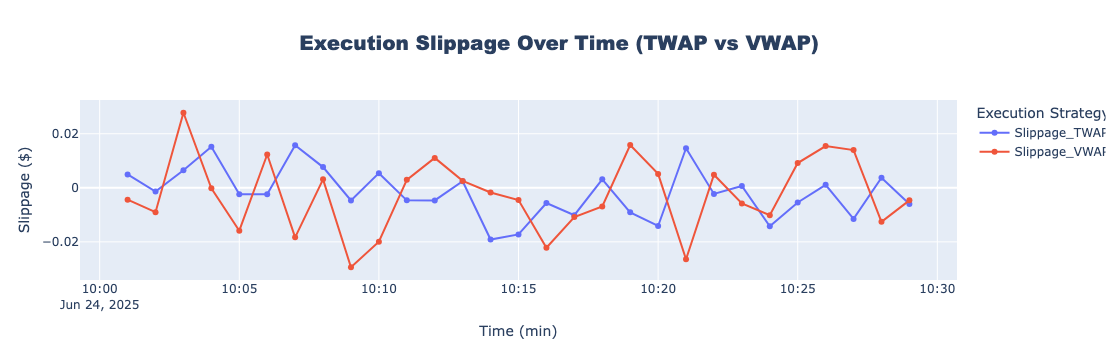

In [11]:

slippage_df = execu_df[['Datetime', 'Slippage_TWAP', 'Slippage_VWAP']].copy()

# 转换为长格式
slippage_df = slippage_df.melt(
    id_vars='Datetime',
    value_vars=['Slippage_TWAP', 'Slippage_VWAP'],
    var_name='Execution_Type',
    value_name='Slippage'
)

fig = px.line(
    slippage_df,
    x='Datetime',
    y='Slippage',
    color='Execution_Type',
    title='Execution Slippage Over Time (TWAP vs VWAP)',
    markers=True
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center', 'font': dict(size=20, family='Arial Black')},
    yaxis_title="Slippage ($)",
    xaxis_title="Time (min)",
    legend_title="Execution Strategy",
    hovermode='x unified'
)

fig.show()
